# Synergistic sensitivity analysis results
This notebook contains analysis on the results for synergistic analysis of the transition 
to advanced reactors. There are 5 different variables considered:
* Transition Start Time (ts)
* Percent of LWRs receiving license extensions to 80 years of operation (lwr)
* Xe-100 build share (xe100)
* MMR build share (mmr)
* VOYGR build share (voygr)

Seven different sets of analyses are established based on different pairings of the variables. The build share 
variables are not paired together. The analysis is performed using the ``.dat`` files output from Dakota. 
These files are not included in the repository, and the ``dakota.in`` files in each directory need to be 
run before this notebook can be run. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#General plotting variables
metrics = {'enr_u':('Fuel Mass', '(kg)'), 'haleu':('HALEU Mass', '(kg)'), 'swu':('Total SWU', '(kg-SWU)'), 
          'haleu_swu':('HALEU SWU', '(kg-SWU)'), 'waste':('SNF', '(kg)'), 'feed':('HALEU Feed', '(kg)')}
time = np.round(np.linspace(0,1499,1499)/12 + 1965,2)

## LWR + Xe-100 Share

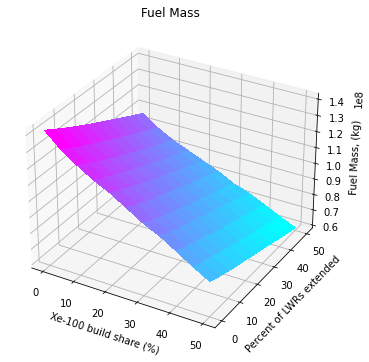

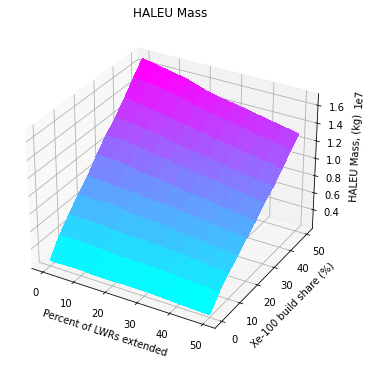

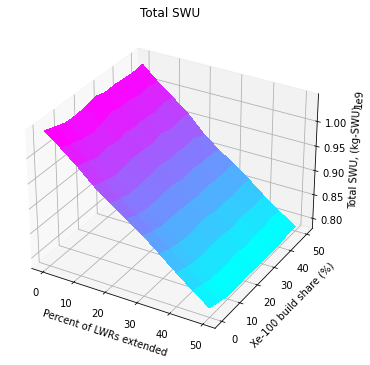

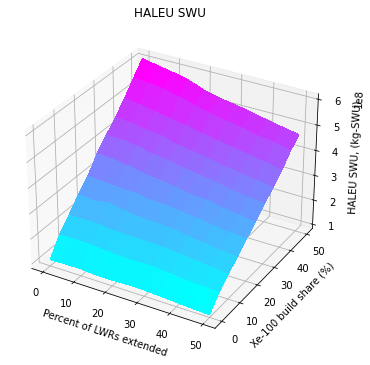

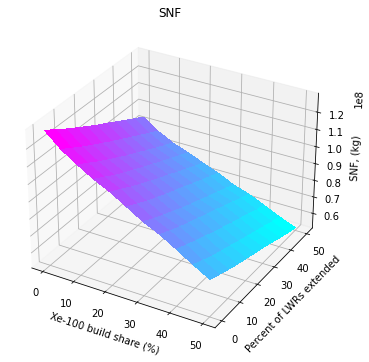

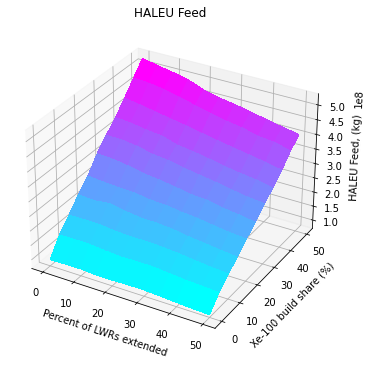

In [4]:
lwr_xe100_file = "lwr_xe100.dat"
lwr_xe100_data = pd.read_csv(lwr_xe100_file, sep="\s+",header=0)

for metric in metrics:
    X = lwr_xe100_data['lwr'].values.reshape(11,11)
    Y = lwr_xe100_data['xe100'].values.reshape(11,11)
    Z = lwr_xe100_data[metric].values.reshape(11,11)
    
    fig = plt.figure(figsize=(9,6))
    ax = plt.axes(projection ='3d')
    if metric == 'enr_u' or metric == 'waste':
        ax.plot_surface(Y, X, Z, cmap='cool',
                           linewidth=0.2, antialiased=False)
        plt.ylabel('Percent of LWRs extended')
        plt.xlabel('Xe-100 build share (%)')
    else:
        ax.plot_surface(X, Y, Z, cmap='cool',
                           linewidth=0.2, antialiased=False)
        plt.xlabel('Percent of LWRs extended')
        plt.ylabel('Xe-100 build share (%)')
    ax.set_zlabel(f"{metrics[metric][0]}, {metrics[metric][1]}")
    plt.title(metrics[metric][0])
    plt.savefig(f'figures/lwr_xe100_share_{metric}.pdf')

## LWR + Xe-100 Burnup

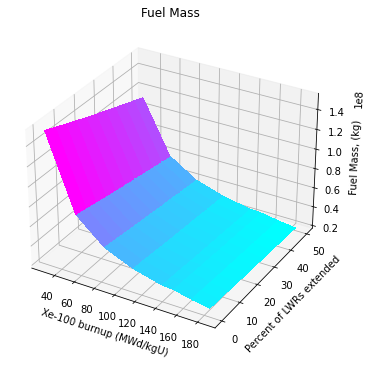

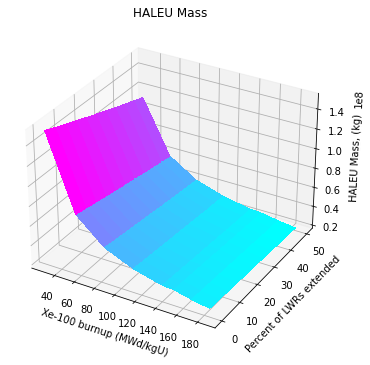

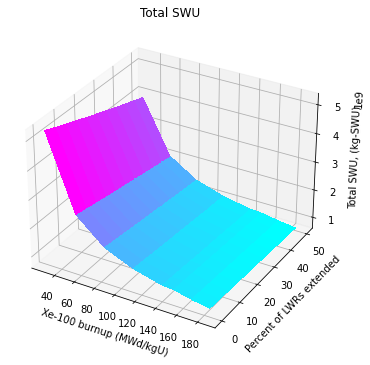

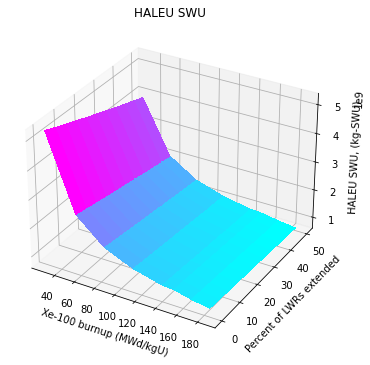

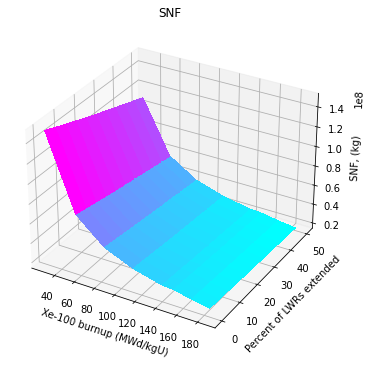

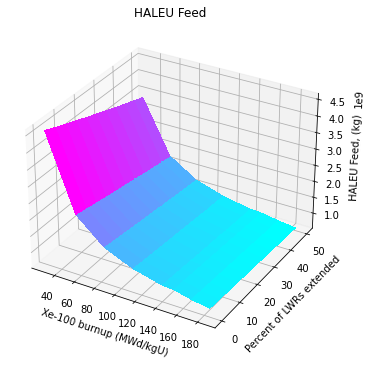

In [35]:
lwr_xe100_file = "lwr_xe100_burnup.dat"
lwr_xe100_data = pd.read_csv(lwr_xe100_file, sep="\s+",header=0)

for metric in metrics:
    X = lwr_xe100_data['xe100_burnup'].values.reshape(11,8)
    Y = lwr_xe100_data['lwr'].values.reshape(11,8)
    Z = lwr_xe100_data[metric].values.reshape(11,8)
    
    fig = plt.figure(figsize=(9,6))
    ax = plt.axes(projection ='3d')
    ax.plot_surface(X, Y, Z, cmap='cool',
                           linewidth=0.2, antialiased=False)
    plt.ylabel('Percent of LWRs extended')
    plt.xlabel('Xe-100 burnup (MWd/kgU)')
    ax.set_zlabel(f"{metrics[metric][0]}, {metrics[metric][1]}")
    plt.title(metrics[metric][0])
    plt.savefig(f'figures/lwr_xe100_burnup_{metric}.pdf')

## LWR + MMR Share

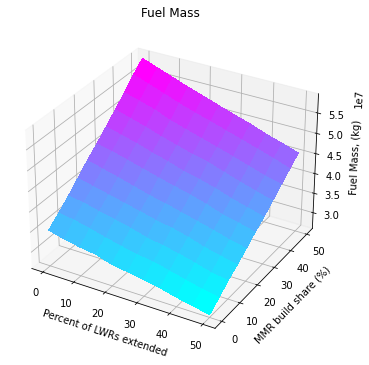

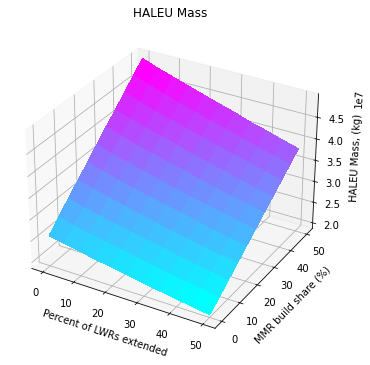

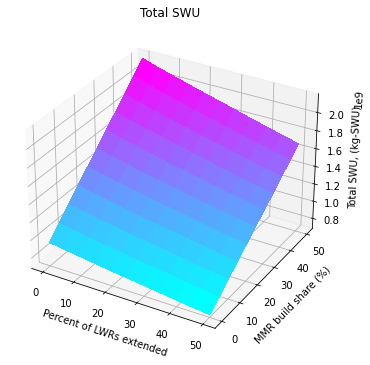

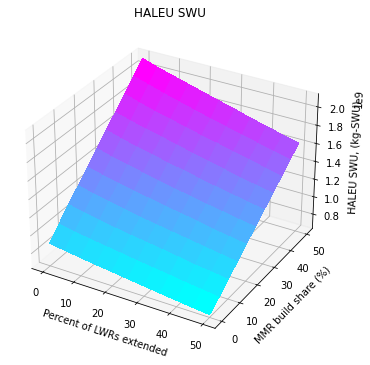

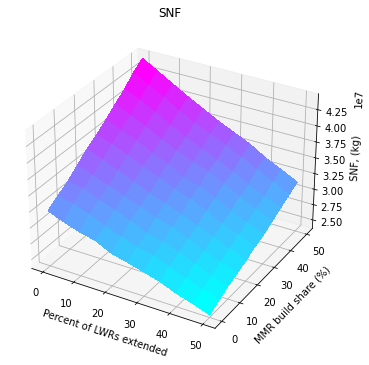

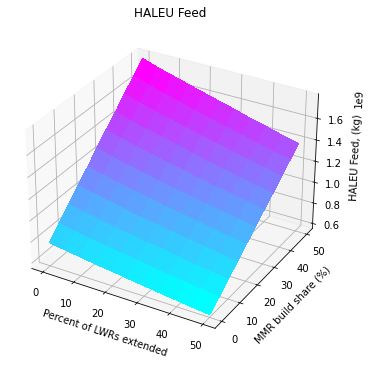

In [7]:
lwr_mmr_file = "lwr_mmr.dat"
lwr_mmr_data = pd.read_csv(lwr_mmr_file, sep="\s+",header=0)

for metric in metrics:
    X = lwr_mmr_data['lwr'].values.reshape(11,11)
    Y = lwr_mmr_data['mmr'].values.reshape(11,11)
    Z = lwr_mmr_data[metric].values.reshape(11,11)
    
    fig = plt.figure(figsize=(9,6))
    ax = plt.axes(projection ='3d')
    ax.plot_surface(X, Y, Z, cmap='cool',
                       linewidth=0.2, antialiased=False)
    ax.set_zlabel(f"{metrics[metric][0]}, {metrics[metric][1]}")
    plt.xlabel('Percent of LWRs extended')
    plt.ylabel('MMR build share (%)')
    plt.title(metrics[metric][0])
    plt.savefig(f'figures/lwr_mmr_share_{metric}.pdf')

## LWR + MMR Burnup

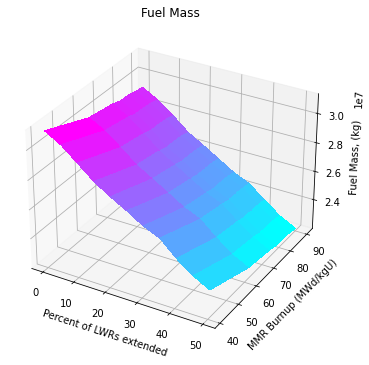

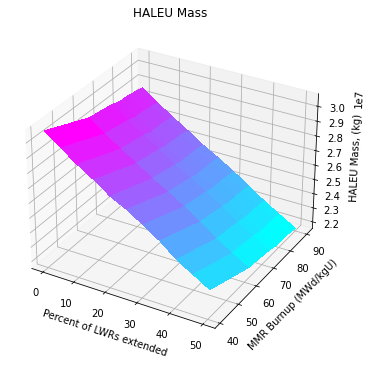

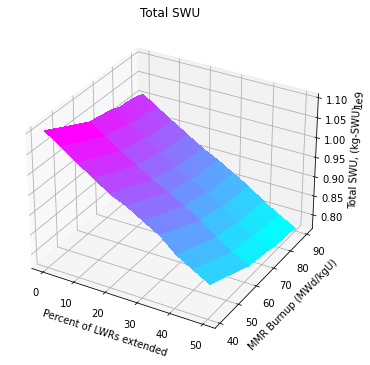

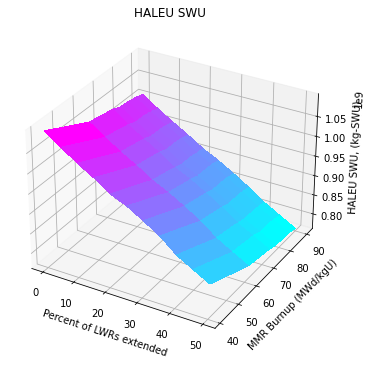

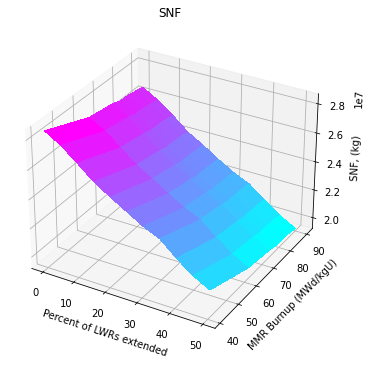

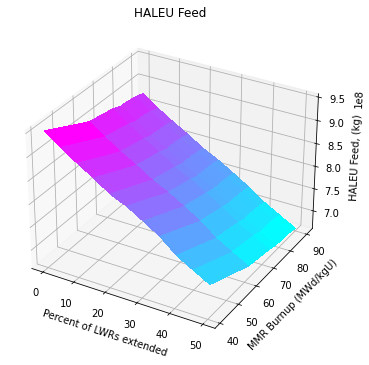

In [10]:
lwr_mmr_file = "lwr_mmr_burnup.dat"
lwr_mmr_data = pd.read_csv(lwr_mmr_file, sep="\s+",header=0)

for metric in metrics:
    X = lwr_mmr_data['lwr'].values.reshape(11,7)
    Y = lwr_mmr_data['mmr_burnup'].values.reshape(11,7)
    Z = lwr_mmr_data[metric].values.reshape(11,7)
    
    fig = plt.figure(figsize=(9,6))
    ax = plt.axes(projection ='3d')
    ax.plot_surface(X, Y, Z, cmap='cool',
                       linewidth=0.2, antialiased=False)
    ax.set_zlabel(f"{metrics[metric][0]}, {metrics[metric][1]}")
    plt.xlabel('Percent of LWRs extended')
    plt.ylabel('MMR Burnup (MWd/kgU)')
    plt.title(metrics[metric][0])
    plt.savefig(f'figures/lwr_mmr_burnup_{metric}.pdf')

## LWR + VOYGR Share

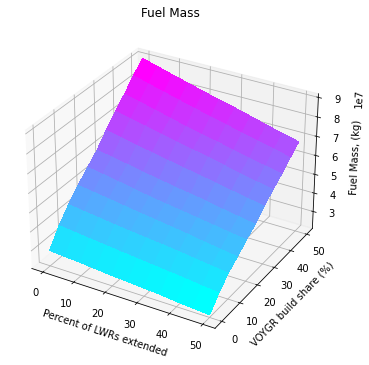

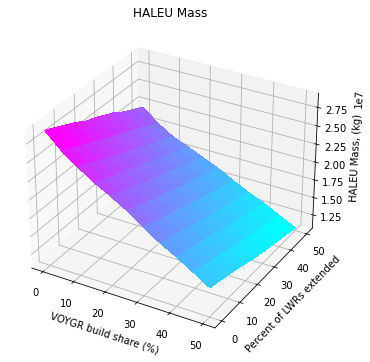

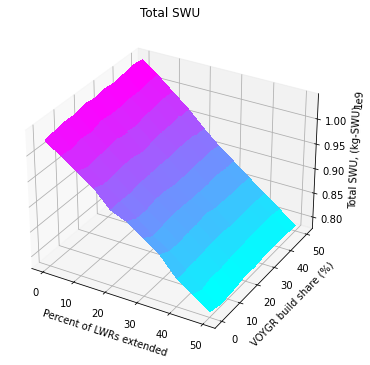

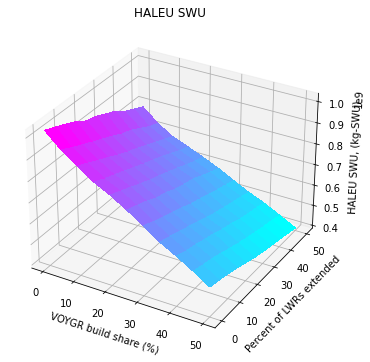

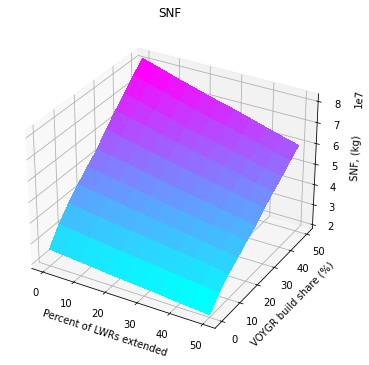

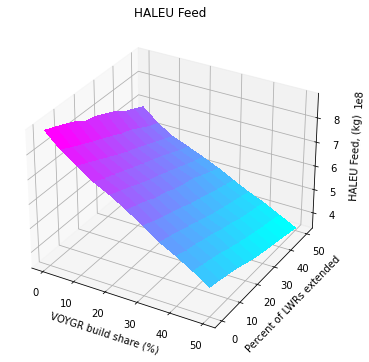

In [36]:
lwr_voygr_file = "lwr_voygr.dat"
lwr_voygr_data = pd.read_csv(lwr_voygr_file, sep="\s+",header=0)

for metric in metrics:
    X = lwr_voygr_data['lwr'].values.reshape(11,11)
    Y = lwr_voygr_data['voygr'].values.reshape(11,11)
    Z = lwr_voygr_data[metric].values.reshape(11,11)
    
    fig = plt.figure(figsize=(9,6))
    ax = plt.axes(projection ='3d')
    if metric == 'haleu' or metric == 'haleu_swu' or metric == 'feed':
        ax.plot_surface(Y, X, Z, cmap='cool',
                       linewidth=0.2, antialiased=False)
        plt.ylabel('Percent of LWRs extended')
        plt.xlabel('VOYGR build share (%)')
    else:
        ax.plot_surface(X, Y, Z, cmap='cool',
                       linewidth=0.2, antialiased=False)
        plt.xlabel('Percent of LWRs extended')
        plt.ylabel('VOYGR build share (%)')
    ax.set_zlabel(f"{metrics[metric][0]}, {metrics[metric][1]}")
    plt.title(metrics[metric][0])
    plt.savefig(f'figures/lwr_voygr_share_{metric}.pdf')

## TS + LWR

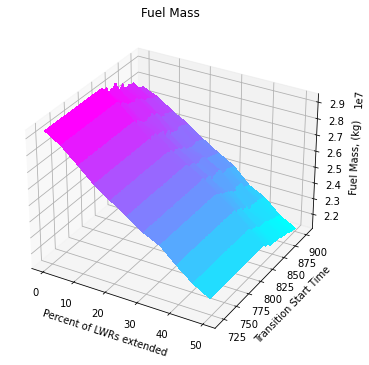

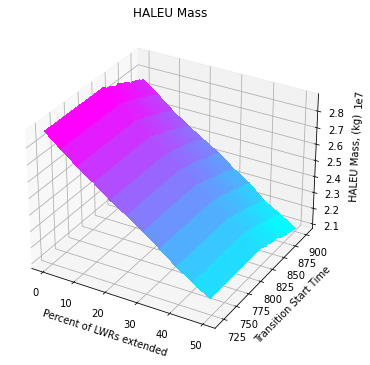

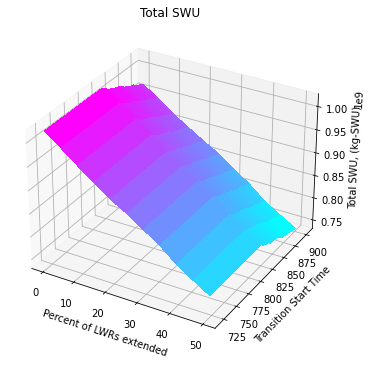

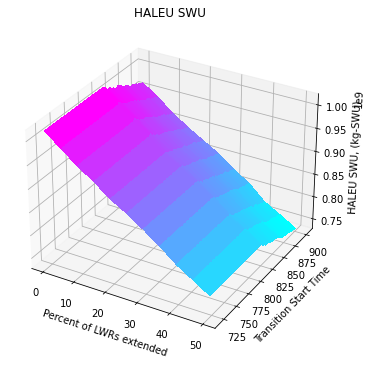

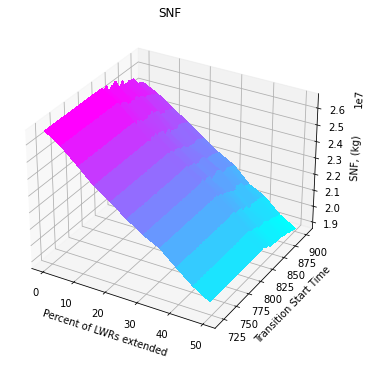

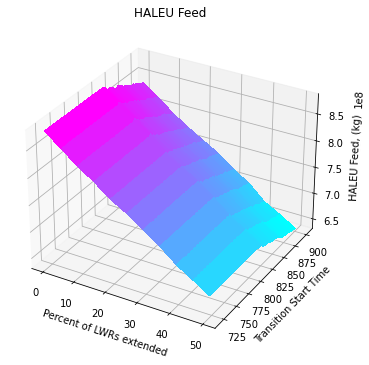

In [12]:
ts_lwr_file = "ts_lwr.dat"
ts_lwr_data = pd.read_csv(ts_lwr_file, sep="\s+",header=0)

for metric in metrics:
    X = ts_lwr_data['lwr'].values.reshape(11,61)
    Y = ts_lwr_data['ts'].values.reshape(11,61)
    Z = ts_lwr_data[metric].values.reshape(11,61)
    
    fig = plt.figure(figsize=(9,6))
    ax = plt.axes(projection ='3d')
    ax.plot_surface(X, Y, Z, cmap='cool',
                       linewidth=0.2, antialiased=False)
    ax.set_zlabel(f"{metrics[metric][0]}, {metrics[metric][1]}")
    plt.xlabel('Percent of LWRs extended')
    plt.ylabel('Transition Start Time')
    plt.title(metrics[metric][0])
    plt.savefig(f'figures/ts_lwr_{metric}.pdf')

## TS + Xe-100 Share

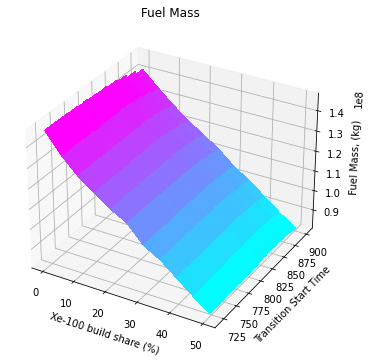

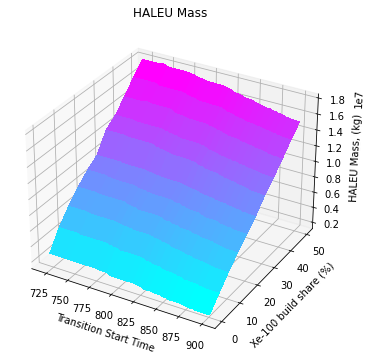

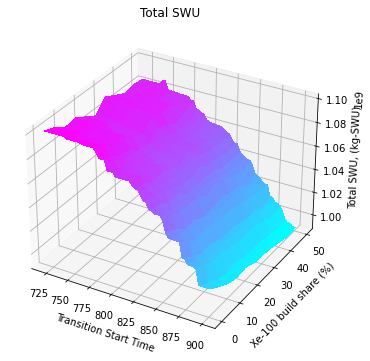

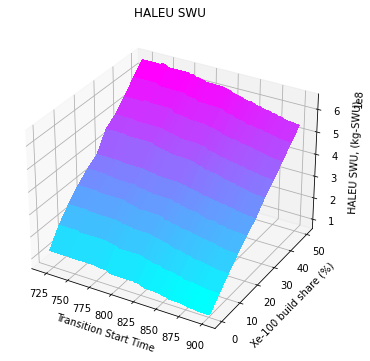

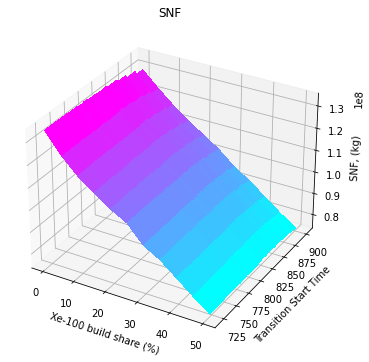

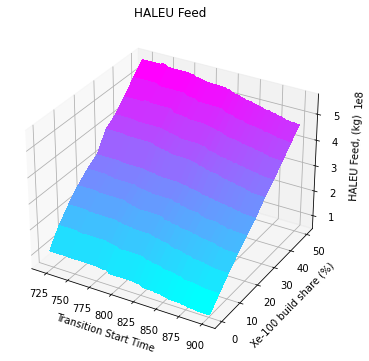

In [13]:
ts_xe100_file = "ts_xe100.dat"
ts_xe100_data = pd.read_csv(ts_xe100_file, sep="\s+",header=0)

for metric in metrics:
    X = ts_xe100_data['xe100'].values.reshape(11,61)
    Y = ts_xe100_data['ts'].values.reshape(11,61)
    Z = ts_xe100_data[metric].values.reshape(11,61)
    
    fig = plt.figure(figsize=(9,6))
    ax = plt.axes(projection ='3d')
    if metric == 'enr_u' or metric == 'waste':
        ax.plot_surface(X, Y, Z, cmap='cool',
                       linewidth=0.2, antialiased=False)
        plt.ylabel('Transition Start Time')
        plt.xlabel('Xe-100 build share (%)')
    else:
        ax.plot_surface(Y, X, Z, cmap='cool',
                       linewidth=0.2, antialiased=False)
        plt.xlabel('Transition Start Time')
        plt.ylabel('Xe-100 build share (%)')
    ax.set_zlabel(f"{metrics[metric][0]}, {metrics[metric][1]}")
    plt.title(metrics[metric][0])
    plt.savefig(f'figures/ts_xe100_share_{metric}.pdf')

## TS + Xe-100 Burnup

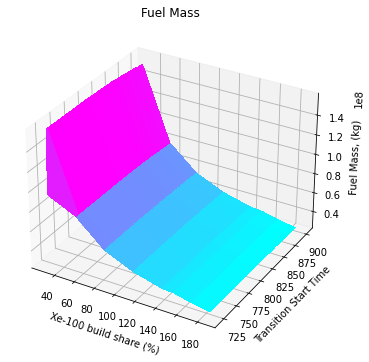

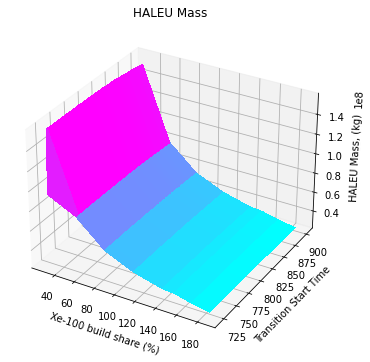

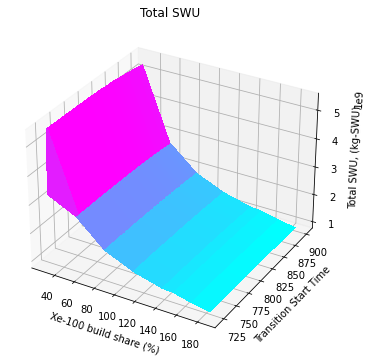

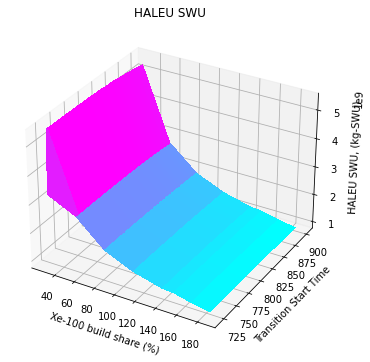

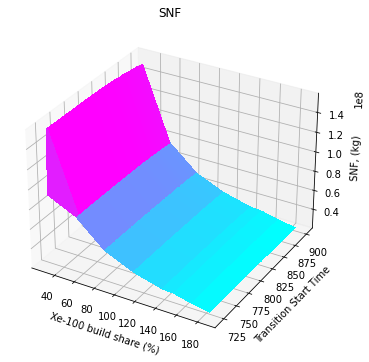

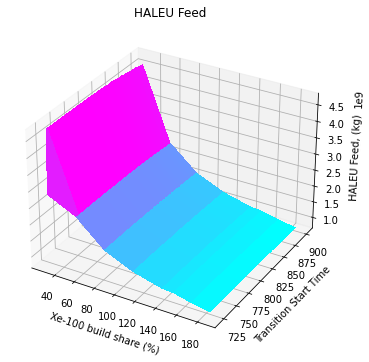

In [17]:
ts_xe100_file = "ts_xe100_burnup.dat"
ts_xe100_data = pd.read_csv(ts_xe100_file, sep="\s+",header=0)

for metric in metrics:
    X = ts_xe100_data['xe100_burnup'].values.reshape(61, 8)
    Y = ts_xe100_data['ts'].values.reshape(61, 8)
    Z = ts_xe100_data[metric].values.reshape(61,8)
    
    fig = plt.figure(figsize=(9,6))
    ax = plt.axes(projection ='3d')
    ax.plot_surface(X, Y, Z, cmap='cool',
                       linewidth=0.2, antialiased=False)
    plt.ylabel('Transition Start Time')
    plt.xlabel('Xe-100 build share (%)')
    ax.set_zlabel(f"{metrics[metric][0]}, {metrics[metric][1]}")
    plt.title(metrics[metric][0])
    plt.savefig(f'figures/ts_xe100_burnup_{metric}.pdf')

## TS + MMR Share

In [18]:
ts_mmr_file = "ts_mmr.dat"
ts_mmr_data = pd.read_csv(ts_mmr_file, sep="\s+",header=0)

for metric in metrics:
    Y = ts_mmr_data['mmr'].values.reshape(11,61)
    X = ts_mmr_data['ts'].values.reshape(11,61)
    Z = ts_mmr_data[metric].values.reshape(11,61)

    fig = plt.figure(figsize=(9,6))
    ax = plt.axes(projection ='3d')
    ax.plot_surface(X, Y, Z, cmap='plasma',
                       linewidth=0.2, antialiased=False)
    ax.set_zlabel(f"{metrics[metric][0]}, {metrics[metric][1]}")
    plt.xlabel('Transition Start Time')
    plt.ylabel('MMR build share (%)')
    plt.title(metrics[metric][0])
    plt.savefig(f'figures/ts_mmr_share_{metric}.pdf')

ValueError: cannot reshape array of size 0 into shape (11,61)

## TS + MMR Burnup

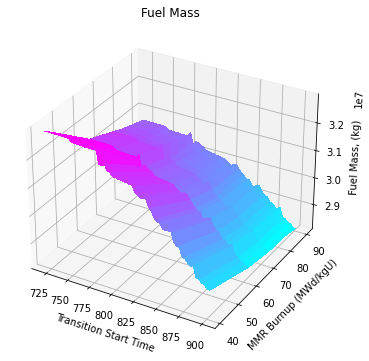

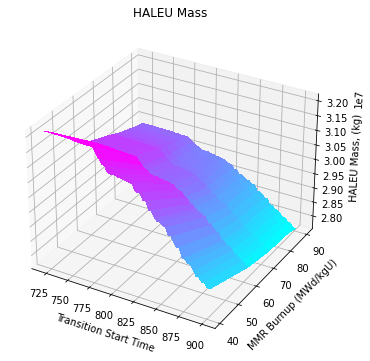

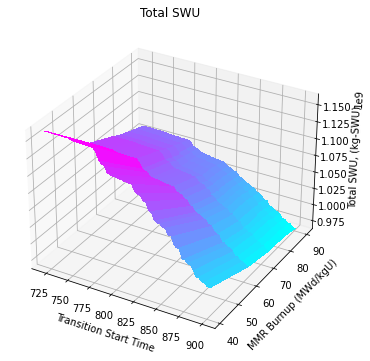

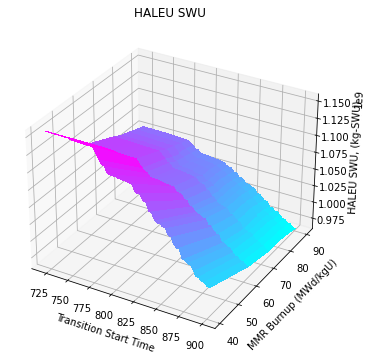

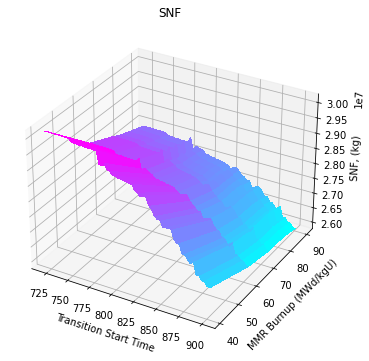

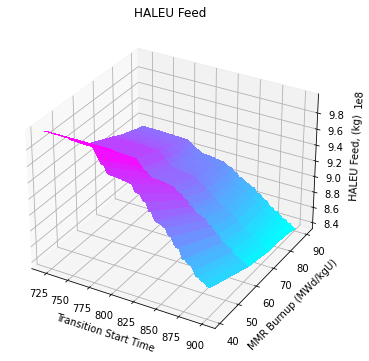

In [21]:
ts_mmr_file = "ts_mmr_burnup.dat"
ts_mmr_data = pd.read_csv(ts_mmr_file, sep="\s+",header=0)

for metric in metrics:
    X = ts_mmr_data['ts'].values.reshape(61,7)
    Y = ts_mmr_data['mmr_burnup'].values.reshape(61,7)
    Z = ts_mmr_data[metric].values.reshape(61,7)
    
    fig = plt.figure(figsize=(9,6))
    ax = plt.axes(projection ='3d')
    ax.plot_surface(X, Y, Z, cmap='cool',
                       linewidth=0.2, antialiased=False)
    ax.set_zlabel(f"{metrics[metric][0]}, {metrics[metric][1]}")
    plt.xlabel('Transition Start Time')
    plt.ylabel('MMR Burnup (MWd/kgU)')
    plt.title(metrics[metric][0])
    plt.savefig(f'figures/ts_mmr_burnup_{metric}.pdf')

## TS + VOYGR Share 

In [22]:
ts_voygr_file = "ts_voygr.dat"
ts_voygr_data = pd.read_csv(ts_voygr_file, sep="\s+",header=0)

for metric in metrics:
    X = ts_voygr_data['voygr'].values.reshape(11,61)
    Y = ts_voygr_data['ts'].values.reshape(11,61)
    Z = ts_voygr_data[metric].values.reshape(11,61)
    
    fig = plt.figure(figsize=(9,6))
    ax = plt.axes(projection ='3d')
    if metric == 'enr_u' or metric == 'swu' or metric == 'waste':
        ax.plot_surface(Y, X, Z, cmap='cool',
                           linewidth=0.2, antialiased=False)
        plt.xlabel('Transition Start Time')
        plt.ylabel('VOYGR build share (%)')
    else:
        ax.plot_surface(X, Y, Z, cmap='cool',
                           linewidth=0.2, antialiased=False)
        plt.ylabel('Transition Start Time')
        plt.xlabel('VOYGR build share (%)')
    ax.set_zlabel(f"{metrics[metric][0]}, {metrics[metric][1]}")
    plt.title(metrics[metric][0])
    plt.savefig(f'figures/ts_voygr_share_{metric}.pdf')

ValueError: cannot reshape array of size 0 into shape (11,61)

## MMR Share + MMR Burnup

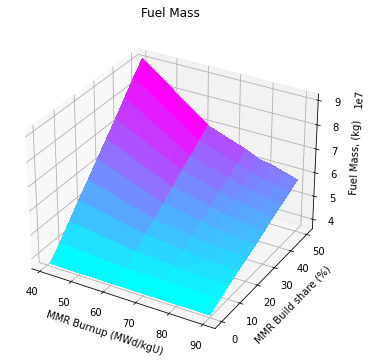

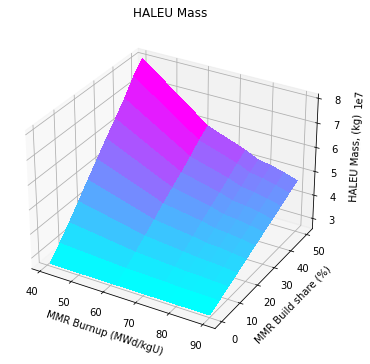

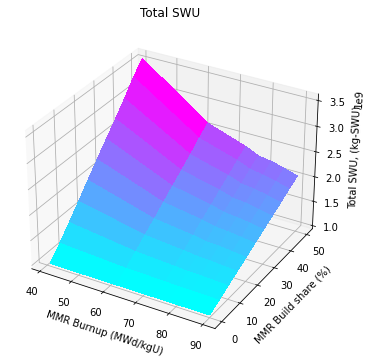

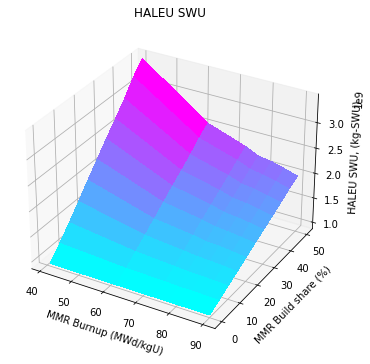

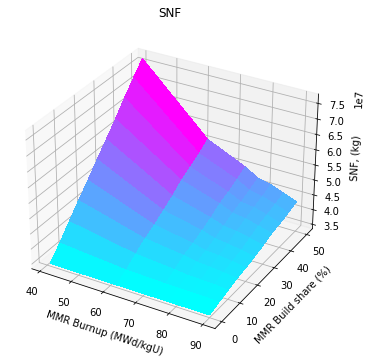

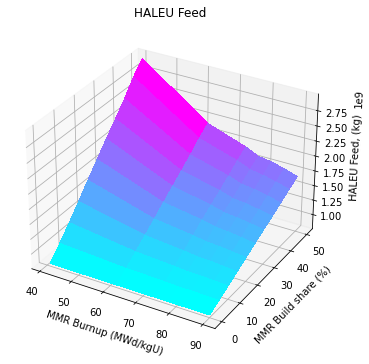

In [38]:
mmr_mmr_file = "mmr_share_mmr_burnup.dat"
mmr_mmr_data = pd.read_csv(mmr_mmr_file, sep="\s+",header=0)

for metric in metrics:
    X = mmr_mmr_data['mmr_burnup'].values.reshape(11,7)
    Y = mmr_mmr_data['mmr_share'].values.reshape(11,7)
    Z = mmr_mmr_data[metric].values.reshape(11,7)
    
    fig = plt.figure(figsize=(9,6))
    ax = plt.axes(projection ='3d')
    ax.plot_surface(X, Y, Z, cmap='cool',
                       linewidth=0.2, antialiased=False)
    plt.ylabel('MMR Build share (%)')
    plt.xlabel('MMR Burnup (MWd/kgU)')
    ax.set_zlabel(f"{metrics[metric][0]}, {metrics[metric][1]}")
    plt.title(metrics[metric][0])
    plt.savefig(f'figures/mmr_share_mmr_burnup_{metric}.pdf')

## Xe-100 Share + MMR Burnup

In [9]:
xe100_mmr_file = "xe100_share_mmr_burnup.dat"
xe100_mmr_data = pd.read_csv(xe100_mmr_file, sep="\s+",header=0)

for metric in metrics:
    X = xe100_mmr_data['xe100_share'].values.reshape(11,7)
    Y = xe100_mmr_data['mmr_burnup'].values.reshape(11,7)
    Z = xe100_mmr_data[metric].values.reshape(11,7)
    
    fig = plt.figure(figsize=(9,6))
    ax = plt.axes(projection ='3d')
    if metric == 'enr_u' or metric == 'swu' or metric == 'waste':
        ax.plot_surface(Y, X, Z, cmap='plasma',
                           linewidth=0.2, antialiased=False)
        plt.xlabel('Xe-100 Build share (%)')
        plt.ylabel('MMR Burnup (MWd/kgU)')
    else:
        ax.plot_surface(X, Y, Z, cmap='plasma',
                           linewidth=0.2, antialiased=False)
        plt.ylabel('Xe-100 Build share (%)')
        plt.xlabel('MMR Burnup (MWd/kgU)')
    ax.set_zlabel(f"{metrics[metric][0]}, {metrics[metric][1]}")
    plt.title(metrics[metric][0])
    plt.savefig(f'figures/xe100_share_mmr_burnup_{metric}.pdf')

ValueError: cannot reshape array of size 38 into shape (11,7)

## VOYGR Share + MMR Burnup

In [10]:
voygr_mmr_file = "voygr_share_mmr_burnup.dat"
voygr_mmr_data = pd.read_csv(voygr_mmr_file, sep="\s+",header=0)

for metric in metrics:
    X = voygr_mmr_data ['voygr_share'].values.reshape(11,7)
    Y = voygr_mmr_data ['mmr_burnup'].values.reshape(11,7)
    Z = voygr_mmr_data [metric].values.reshape(11,7)
    
    fig = plt.figure(figsize=(9,6))
    ax = plt.axes(projection ='3d')
    if metric == 'enr_u' or metric == 'swu' or metric == 'waste':
        ax.plot_surface(Y, X, Z, cmap='plasma',
                           linewidth=0.2, antialiased=False)
        plt.xlabel('VOYGR Build share (%)')
        plt.ylabel('MMR Burnup (MWd/kgU)')
    else:
        ax.plot_surface(X, Y, Z, cmap='plasma',
                           linewidth=0.2, antialiased=False)
        plt.ylabel('VOYGR Build share (%)')
        plt.xlabel('MMR Burnup (MWd/kgU)')
    ax.set_zlabel(f"{metrics[metric][0]}, {metrics[metric][1]}")
    plt.title(metrics[metric][0])
    plt.savefig(f'figures/voygr_share_mmr_burnup_{metric}.pdf')

ValueError: cannot reshape array of size 38 into shape (11,7)

## MMR Share + Xe-100 Burnup

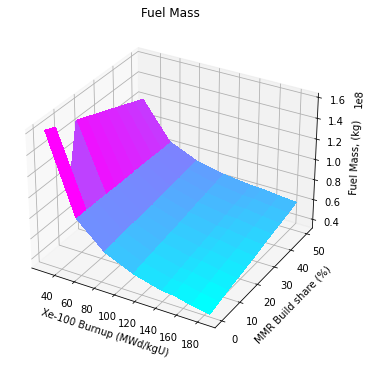

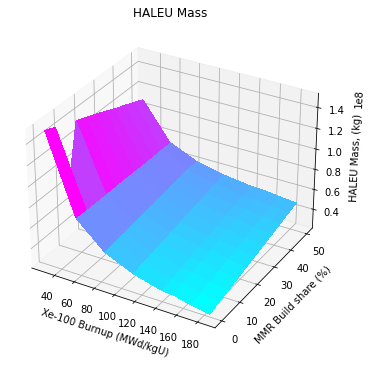

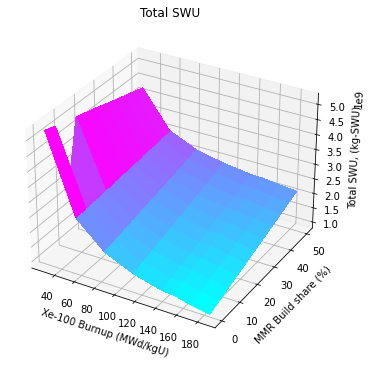

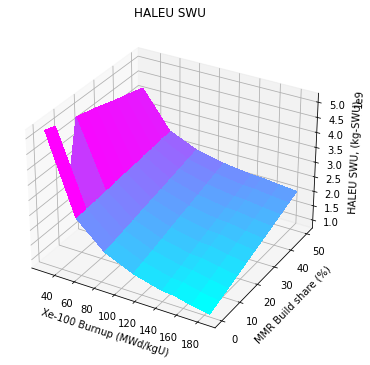

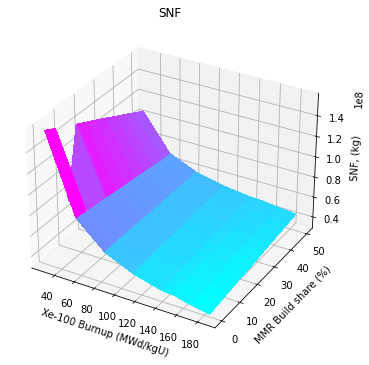

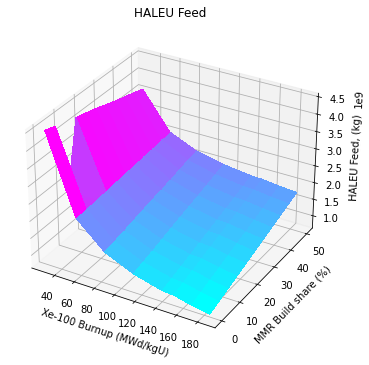

In [45]:
mmr_xe100_file = "mmr_share_xe100_burnup.dat"
mmr_xe100_data = pd.read_csv(mmr_xe100_file, sep="\s+",header=0)

for metric in metrics:
    X = mmr_xe100_data['xe100_burnup'].values.reshape(11,8)
    Y = mmr_xe100_data['mmr_share'].values.reshape(11,8)
    Z = mmr_xe100_data[metric].values.reshape(11,8)
    
    fig = plt.figure(figsize=(9,6))
    ax = plt.axes(projection ='3d')
    ax.plot_surface(X, Y, Z, cmap='cool',
                           linewidth=0.2, antialiased=False)
    plt.ylabel('MMR Build share (%)')
    plt.xlabel('Xe-100 Burnup (MWd/kgU)')
    ax.set_zlabel(f"{metrics[metric][0]}, {metrics[metric][1]}")
    plt.title(metrics[metric][0])
    plt.savefig(f'figures/mmr_share_xe100_burnup_{metric}.pdf')

In [47]:
mmr_xe100_data[0:20]

,%eval_id,interface,mmr_share,xe100_burnup,enr_u,haleu,swu,haleu_swu,waste,feed
0,1,NO_ID,0,28,1.611685e+08,1.508525e+08,5.269684e+09,5.200061e+09,1.585474e+08,4.516718e+09
1,2,NO_ID,0,56,8.667930e+07,7.636328e+07,2.701954e+09,2.632331e+09,8.405818e+07,2.286415e+09
2,3,NO_ID,0,84,6.184864e+07,5.153263e+07,1.846012e+09,1.776390e+09,5.922755e+07,1.542953e+09
3,4,NO_ID,0,112,4.943377e+07,3.911775e+07,1.418057e+09,1.348434e+09,4.681268e+07,1.171236e+09
4,5,NO_ID,0,140,4.198504e+07,3.166902e+07,1.161291e+09,1.091668e+09,3.936393e+07,9.482114e+08
5,6,NO_ID,0,151,4.118516e+07,3.086914e+07,1.133718e+09,1.064095e+09,3.856407e+07,9.242620e+08
6,7,NO_ID,0,168,3.701890e+07,2.670288e+07,9.901021e+08,9.204794e+08,3.439781e+07,7.995188e+08
7,8,NO_ID,0,185,3.388052e+07,2.356451e+07,8.819186e+08,8.122959e+08,3.125943e+07,7.055517e+08
8,9,NO_ID,5,28,1.570153e+08,1.463566e+08,5.157183e+09,5.085247e+09,1.532053e+08,4.413480e+09
9,10,NO_ID,5,56,8.660998e+07,7.595125e+07,2.730229e+09,2.658293e+09,8.279995e+07,2.305454e+09


## Xe-100 Share + Xe-100 Burnup

In [12]:
xe100_xe100_file = "xe100_share_xe100_burnup.dat"
xe100_xe100_data = pd.read_csv(xe100_xe100_file, sep="\s+",header=0)

for metric in metrics:
    X = xe100_xe100_data['xe100_share'].values.reshape(11,8)
    Y = xe100_xe100_data['xe100_burnup'].values.reshape(11,8)
    Z = xe100_xe100_data[metric].values.reshape(11,8)
    
    fig = plt.figure(figsize=(9,6))
    ax = plt.axes(projection ='3d')
    if metric == 'enr_u' or metric == 'swu' or metric == 'waste':
        ax.plot_surface(Y, X, Z, cmap='plasma',
                           linewidth=0.2, antialiased=False)
        plt.xlabel('Xe-100 Build share (%)')
        plt.ylabel('Xe-100 Burnup (MWd/kgU)')
    else:
        ax.plot_surface(X, Y, Z, cmap='plasma',
                           linewidth=0.2, antialiased=False)
        plt.ylabel('Xe-100 Build share (%)')
        plt.xlabel('Xe-100 Burnup (MWd/kgU)')
    ax.set_zlabel(f"{metrics[metric][0]}, {metrics[metric][1]}")
    plt.title(metrics[metric][0])
    plt.savefig(f'figures/xe100_share_xe100_burnup_{metric}.pdf')

FileNotFoundError: [Errno 2] No such file or directory: 'xe100_share_xe100_burnup.dat'

## VOYGR Share + Xe-100 Burnup

In [13]:
voygr_xe100_file = "voygr_share_xe100_burnup.dat"
voygr_xe100_data = pd.read_csv(voygr_xe100_file, sep="\s+",header=0)

for metric in metrics:
    X = voygr_xe100_data['voygr_share'].values.reshape(11,8)
    Y = voygr_xe100_data['xe100_burnup'].values.reshape(11,8)
    Z = voygr_xe100_data[metric].values.reshape(11,8)
    
    fig = plt.figure(figsize=(9,6))
    ax = plt.axes(projection ='3d')
    if metric == 'enr_u' or metric == 'swu' or metric == 'waste':
        ax.plot_surface(Y, X, Z, cmap='plasma',
                           linewidth=0.2, antialiased=False)
        plt.xlabel('VOYGR Build share (%)')
        plt.ylabel('Xe-100 Burnup (MWd/kgU)')
    else:
        ax.plot_surface(X, Y, Z, cmap='plasma',
                           linewidth=0.2, antialiased=False)
        plt.ylabel('VOYGR Build share (%)')
        plt.xlabel('Xe-100 Burnup (MWd/kgU)')
    ax.set_zlabel(f"{metrics[metric][0]}, {metrics[metric][1]}")
    plt.title(metrics[metric][0])
    plt.savefig(f'figures/voygr_share_xe100_burnup_{metric}.pdf')

FileNotFoundError: [Errno 2] No such file or directory: 'voygr_share_xe100_burnup.dat'